In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import box, Polygon
import numpy as np

In [2]:
# https://opendata.riik.ee/et/dataset/avaliku-korra-vastased-ja-avalikus-kohas-toime-pandud-syyteod
# https://opendata.smit.ee/ppa/csv/avalik_3.csv

import urllib.request
local_file, headers = urllib.request.urlretrieve("https://opendata.smit.ee/ppa/csv/avalik_3.csv")

In [3]:
# read the CSV and strip whitespace
df = pd.read_table(local_file).apply(lambda col: col.str.strip())
df[df == ""] = np.nan

df.head(5)

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,SyndmusTaiendavStatLiik,Seadus,Paragrahv,ParagrahvTais,Loige,Kahjusumma,KohtLiik,MaakondNimetus,ValdLinnNimetus,KohtNimetus,Lest_X,Lest_Y,SyyteoLiik
0,ec410864-1635-18d5-8326-a9a756483dba,2014-12-31,23:50,Kolmapäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,0-499,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Tallinn,Kesklinna linnaosa,6589000-6589499,542000-542499,KT
1,ec4106ca-1635-18d5-8326-a9a756483dba,2014-12-31,20:35,Kolmapäev,MUU,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,0-499,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Raasiku vald,Aruküla alevik,6581000-6581999,561000-561999,VT
2,ec411d9a-1635-18d5-8326-a9a756483dba,2014-12-31,20:00,Kolmapäev,VARGUS,MOBIILTELEFONIVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,500-4999,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Tallinn,Kesklinna linnaosa,6588500-6588999,544000-544499,KT
3,ec4107f6-1635-18d5-8326-a9a756483dba,2014-12-31,18:00,Kolmapäev,VARGUS,TASKUVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,0-499,"AVALIK_KOHT,HOTELL_MOTELL",Harju maakond,Tallinn,Kesklinna linnaosa,6588500-6588999,543000-543499,KT
4,ec413f8c-1635-18d5-8326-a9a756483dba,2014-12-31,17:50,Kolmapäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,0-499,"AVALIK_KOHT,TANKLA",Harju maakond,Tallinn,Lasnamäe linnaosa,6588500-6588999,546500-546999,KT


In [4]:
# convert the provided L-EST coordinate ranges to box-shaped Shapely polygons
df[['lest_x_min', 'lest_x_max']] = df['Lest_X'].str.split('-', expand=True).apply(pd.to_numeric, errors='coerce')
df[['lest_y_min', 'lest_y_max']] = df['Lest_Y'].str.split('-', expand=True).apply(pd.to_numeric, errors='coerce')

df.head(5)

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,SyndmusTaiendavStatLiik,Seadus,Paragrahv,ParagrahvTais,Loige,...,MaakondNimetus,ValdLinnNimetus,KohtNimetus,Lest_X,Lest_Y,SyyteoLiik,lest_x_min,lest_x_max,lest_y_min,lest_y_max
0,ec410864-1635-18d5-8326-a9a756483dba,2014-12-31,23:50,Kolmapäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,...,Harju maakond,Tallinn,Kesklinna linnaosa,6589000-6589499,542000-542499,KT,6589000.0,6589499.0,542000.0,542499.0
1,ec4106ca-1635-18d5-8326-a9a756483dba,2014-12-31,20:35,Kolmapäev,MUU,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,...,Harju maakond,Raasiku vald,Aruküla alevik,6581000-6581999,561000-561999,VT,6581000.0,6581999.0,561000.0,561999.0
2,ec411d9a-1635-18d5-8326-a9a756483dba,2014-12-31,20:00,Kolmapäev,VARGUS,MOBIILTELEFONIVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,...,Harju maakond,Tallinn,Kesklinna linnaosa,6588500-6588999,544000-544499,KT,6588500.0,6588999.0,544000.0,544499.0
3,ec4107f6-1635-18d5-8326-a9a756483dba,2014-12-31,18:00,Kolmapäev,VARGUS,TASKUVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,...,Harju maakond,Tallinn,Kesklinna linnaosa,6588500-6588999,543000-543499,KT,6588500.0,6588999.0,543000.0,543499.0
4,ec413f8c-1635-18d5-8326-a9a756483dba,2014-12-31,17:50,Kolmapäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,...,Harju maakond,Tallinn,Lasnamäe linnaosa,6588500-6588999,546500-546999,KT,6588500.0,6588999.0,546500.0,546999.0


In [5]:
def make_geom(row):
    try:
        return box(row['lest_y_min'], row['lest_x_min'], row['lest_y_max'] + 1, row['lest_x_max'] + 1)
    except Exception as ex:
        return np.nan
    
    lest_y[0], lest_x[0], lest_y[1] + 1, lest_x[1] + 1
    
df['geometry'] = df.apply(make_geom, axis=1)
df.head(5)

IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do not form a closed linestring
IllegalArgumentException: Points of LinearRing do no

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,SyndmusTaiendavStatLiik,Seadus,Paragrahv,ParagrahvTais,Loige,...,ValdLinnNimetus,KohtNimetus,Lest_X,Lest_Y,SyyteoLiik,lest_x_min,lest_x_max,lest_y_min,lest_y_max,geometry
0,ec410864-1635-18d5-8326-a9a756483dba,2014-12-31,23:50,Kolmapäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,...,Tallinn,Kesklinna linnaosa,6589000-6589499,542000-542499,KT,6589000.0,6589499.0,542000.0,542499.0,"POLYGON ((542500 6589000, 542500 6589500, 5420..."
1,ec4106ca-1635-18d5-8326-a9a756483dba,2014-12-31,20:35,Kolmapäev,MUU,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,...,Raasiku vald,Aruküla alevik,6581000-6581999,561000-561999,VT,6581000.0,6581999.0,561000.0,561999.0,"POLYGON ((562000 6581000, 562000 6582000, 5610..."
2,ec411d9a-1635-18d5-8326-a9a756483dba,2014-12-31,20:00,Kolmapäev,VARGUS,MOBIILTELEFONIVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,...,Tallinn,Kesklinna linnaosa,6588500-6588999,544000-544499,KT,6588500.0,6588999.0,544000.0,544499.0,"POLYGON ((544500 6588500, 544500 6589000, 5440..."
3,ec4107f6-1635-18d5-8326-a9a756483dba,2014-12-31,18:00,Kolmapäev,VARGUS,TASKUVARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,...,Tallinn,Kesklinna linnaosa,6588500-6588999,543000-543499,KT,6588500.0,6588999.0,543000.0,543499.0,"POLYGON ((543500 6588500, 543500 6589000, 5430..."
4,ec413f8c-1635-18d5-8326-a9a756483dba,2014-12-31,17:50,Kolmapäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,...,Tallinn,Lasnamäe linnaosa,6588500-6588999,546500-546999,KT,6588500.0,6588999.0,546500.0,546999.0,"POLYGON ((547000 6588500, 547000 6589000, 5465..."


In [6]:
# overall rows in dataframe
display(len(df))
# lost elements because bad geometry/coordinates
display(df['geometry'].isna().sum())
# drop those
df = df.dropna(subset=['geometry'])
# overall rows in dataframe
display(len(df))

40753

359

40394

In [7]:
# create a GeoDataFrame
gdf_3301_poly = gpd.GeoDataFrame(df, geometry='geometry', crs='epsg:3301')

In [8]:
gdf_3301_poly.dtypes

JuhtumId                     object
ToimKpv                      object
ToimKell                     object
ToimNadalapaev               object
SyndmusLiik                  object
SyndmusTaiendavStatLiik      object
Seadus                       object
Paragrahv                    object
ParagrahvTais                object
Loige                        object
Kahjusumma                   object
KohtLiik                     object
MaakondNimetus               object
ValdLinnNimetus              object
KohtNimetus                  object
Lest_X                       object
Lest_Y                       object
SyyteoLiik                   object
lest_x_min                  float64
lest_x_max                  float64
lest_y_min                  float64
lest_y_max                  float64
geometry                   geometry
dtype: object

In [9]:
def avg_damage(x):
    if len(str(x)) > 0:
        try:
            values = str(x).split('-')
            if len(values) == 1:
                return int(values[0])
            elif len(values) == 2:
                return (int(values[0]) + int(values[1])) / 2
            else:
                return 0
        except:
            return 0
    else:
        return 0

gdf_3301_poly['avg_damage'] = gdf_3301_poly['Kahjusumma'].apply(avg_damage)
gdf_3301_poly.sample(5)

,JuhtumId,ToimKpv,ToimKell,ToimNadalapaev,SyndmusLiik,SyndmusTaiendavStatLiik,Seadus,Paragrahv,ParagrahvTais,Loige,...,KohtNimetus,Lest_X,Lest_Y,SyyteoLiik,lest_x_min,lest_x_max,lest_y_min,lest_y_max,geometry,avg_damage
28946,ec319776-1635-18d5-8326-a9a756483dba,2012-10-06,10:00,Laupäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,...,Kesklinna linnaosa,6588000-6588499,543000-543499,KT,6588000.0,6588499.0,543000.0,543499.0,"POLYGON ((543500.000 6588000.000, 543500.000 6...",249.5
19263,ec371c5a-1635-18d5-8326-a9a756483dba,2013-06-20,12:00,Neljapäev,VANDALISM,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,...,NaN,6458500-6458999,411000-411499,VT,6458500.0,6458999.0,411000.0,411499.0,"POLYGON ((411500.000 6458500.000, 411500.000 6...",249.5
21113,ec35acda-1635-18d5-8326-a9a756483dba,2013-05-04,14:00,Laupäev,VARGUS,"MOBIILTELEFONIVARGUS,TASKUVARGUS",Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,...,Lasnamäe linnaosa,6589500-6589999,548500-548999,KT,6589500.0,6589999.0,548500.0,548999.0,"POLYGON ((549000.000 6589500.000, 549000.000 6...",249.5
34757,ec2e5fca-1635-18d5-8326-a9a756483dba,2012-05-25,13:30,Reede,JALGRATTA_MOPEEDI_VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 1.,...,Nõmme linnaosa,6584000-6584499,540500-540999,KT,6584000.0,6584499.0,540500.0,540999.0,"POLYGON ((541000.000 6584000.000, 541000.000 6...",2749.5
13771,ec397b76-1635-18d5-8326-a9a756483dba,2013-11-07,10:25,Neljapäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,...,Kristiine linnaosa,6587500-6587999,541000-541499,KT,6587500.0,6587999.0,541000.0,541499.0,"POLYGON ((541500.000 6587500.000, 541500.000 6...",249.5


<AxesSubplot:>

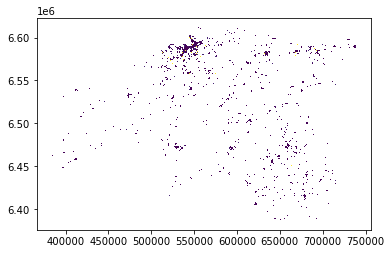

In [10]:
gdf_3301_poly.plot(column='avg_damage')

In [11]:
gdf_3301_poly['poly_id'] = gdf_3301_poly['geometry'].apply(lambda x: x.wkt)

In [12]:
from shapely import wkt

sum_polys = []

for idx, grp in gdf_3301_poly.groupby(['poly_id']):
    avg = grp['avg_damage'].sum()
    geom = wkt.loads(idx)
    sum_polys.append((avg, geom))

t_df = pd.DataFrame(sum_polys)
t_df.head(5)
    

,0,1
0,249.5,"POLYGON ((385000 6462000, 385000 6463000, 3840..."
1,0.0,"POLYGON ((397000 6448000, 397000 6449000, 3960..."
2,249.5,"POLYGON ((398000 6448000, 398000 6449000, 3970..."
3,249.5,"POLYGON ((398000 6465000, 398000 6466000, 3970..."
4,499.0,"POLYGON ((398000 6466000, 398000 6467000, 3970..."


In [13]:
t_df = t_df.rename(columns={0: 'avg_damage', 1: 'geometry'})

In [14]:
avg_gdf = gpd.GeoDataFrame(t_df, geometry='geometry', crs='epsg:3301')

<AxesSubplot:>

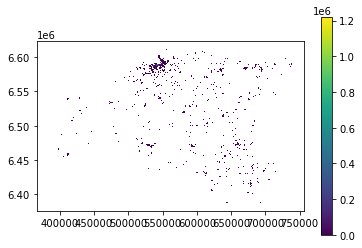

In [15]:
avg_gdf.plot(column='avg_damage', legend=True)

In [16]:
# https://geoportaal.maaamet.ee/eng/Spatial-Data/Administrative-and-Settlement-Division-p312.html
# https://geoportaal.maaamet.ee/docs/haldus_asustus/asustusyksus_shp.zip?t=20201101020927
# https://geoportaal.maaamet.ee/index.php?lang_id=2&page_id=663
tall = gpd.read_file('tallinn_area.shp')

<AxesSubplot:>

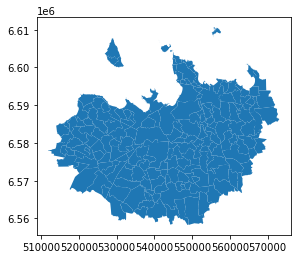

In [17]:
tall.plot()

In [18]:
res_union = gpd.overlay(tall, avg_gdf, how='intersection')
# res_union = gpd.overlay(avg_gdf, tall, how='intersection')

<AxesSubplot:>

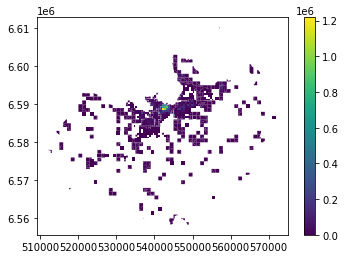

In [19]:
res_union.plot(column="avg_damage", legend=True)

In [20]:
res_union.columns

Index(['ANIMI', 'AKOOD', 'TYYP', 'ONIMI', 'OKOOD', 'MNIMI', 'MKOOD',
       'avg_damage', 'geometry'],
      dtype='object')

<AxesSubplot:>

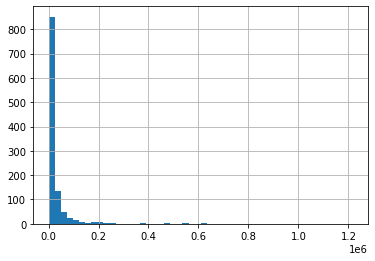

In [21]:
res_union['avg_damage'].hist(bins=50)

In [22]:
import matplotlib.pyplot as plt
import mapclassify as mc

%matplotlib inline

In [23]:
q10_all = mc.Quantiles(res_union['avg_damage'].values,k=5)
q10_all

Quantiles                       

        Interval           Count
--------------------------------
[      0.00,     499.00] |   286
(    499.00,    2749.50] |   173
(   2749.50,    6996.00] |   221
(   6996.00,   30249.00] |   226
(  30249.00, 1218090.50] |   222

In [24]:
res_union['avg_dm_class'] = res_union[['avg_damage']].apply(q10_all)

In [25]:
res_union.sample()

,ANIMI,AKOOD,TYYP,ONIMI,OKOOD,MNIMI,MKOOD,avg_damage,geometry,avg_dm_class
789,Kiisa alevik,3048,7,Saku vald,0719,Harju maakond,0037,249.5,"POLYGON ((539000.000 6566363.240, 538996.180 6...",0


<AxesSubplot:>

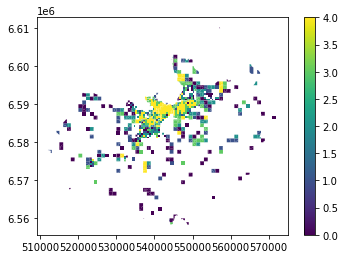

In [26]:
res_union.plot(column="avg_dm_class", legend=True)

In [27]:
import contextily as cx
from contextily.tile import warp_img_transform, warp_tiles, _warper

In [28]:
mapping = dict([(i,s) for i,s in enumerate(q10_all.get_legend_classes())])

In [29]:
new_map = {}
for k,v in mapping.items():
    t = v.replace('(','').replace('[','').replace(')','').replace(']','').split(',')
    # tx = [x.strip() for x in t]
    new_map.update({k: f"{t[0]} to {t[1]} EUR"})

new_map

{0: '      0.00 to      499.00 EUR',
 1: '    499.00 to     2749.50 EUR',
 2: '   2749.50 to     6996.00 EUR',
 3: '   6996.00 to    30249.00 EUR',
 4: '  30249.00 to  1218090.50 EUR'}

In [30]:
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

C:\dev\conda3\envs\geopy2020\lib\site-packages\contextily\tile.py:353: RasterioDeprecationWarning: Source dataset should be opened in read-only mode. Use of datasets opened in modes other than 'r' will be disallowed in a future version.
  img.transpose(2, 0, 1), transform, "EPSG:3857", t_crs, resampling


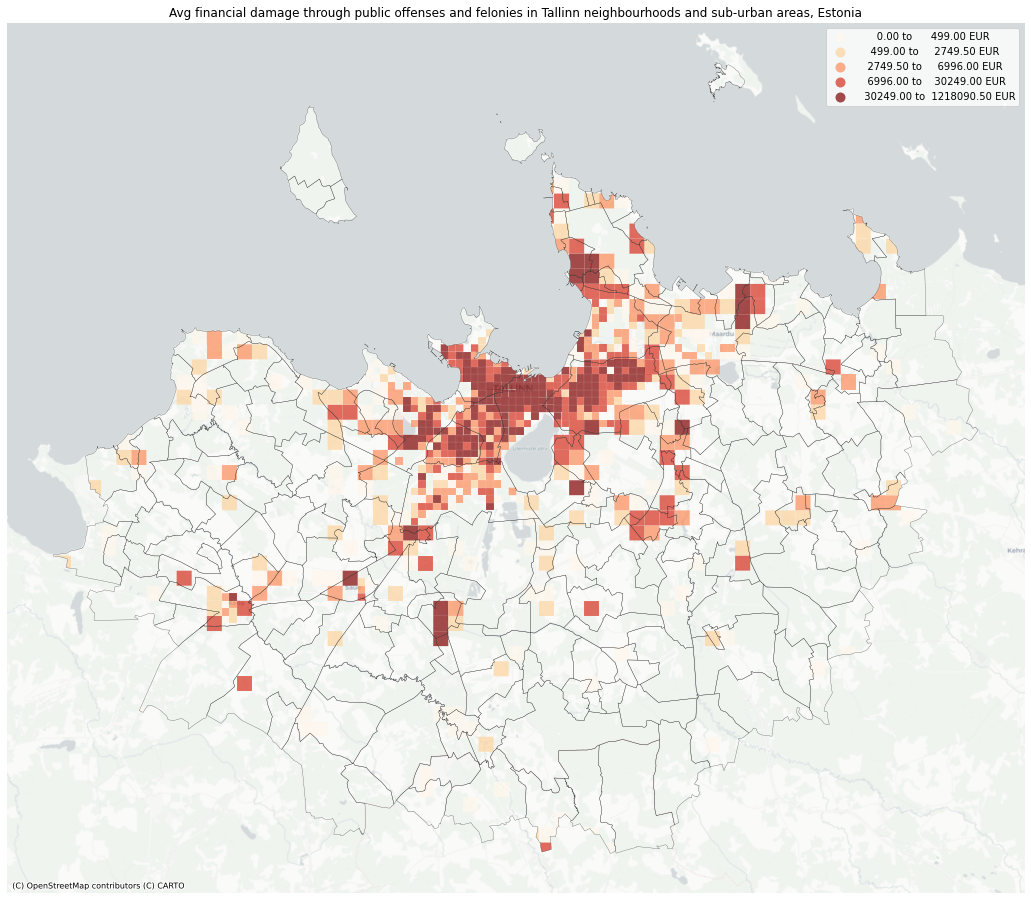

In [34]:
fig, ax = plt.subplots(1, figsize=(21, 16))

tall.boundary.plot(edgecolor='black',linewidth=0.3, alpha=0.7, ax=ax)

res_union.plot(column='avg_dm_class', cmap='OrRd', linewidth=0.1, alpha=0.7, ax=ax, categorical=True, edgecolor='white', legend=True)

leg = ax.get_legend()

replace_legend_items(leg, new_map)

cx.add_basemap(ax, crs=res_union.crs.to_string(), source=cx.providers.CartoDB.Positron)
ax.set_axis_off()

plt.title('Avg financial damage through public offenses and felonies in Tallinn neighbourhoods and sub-urban areas, Estonia')

plt.show()
fig.savefig('../source/_static/day-03-polys.png', bbox_inches='tight')